# Student Performance Indicator

## 1.0 Problem Statement

This project aims to understand the factors influencing students' performance, as measured by their test scores. Specifically, it will examine how variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and participation in a Test Preparation Course affect academic outcomes.

## 2.0 Data Collection

Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1. Import data and required dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3.0 Data Exploration

### 3.1 Checking missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset.

### 3.2 Checking duplicates

In [8]:
df.duplicated().sum()

0

#### There are no duplicate values in the dataset.

### 3.3 Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# example
print(df['race_ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


### 3.5 Check statistics of the dataset

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

- The mean scores across all subjects (Math, Writing, and Reading) are close to each other. This suggests that on average, students perform similarly across these subjects.
- The standard deviations for the scores in all subjects are also close.
- The minimum score for Math is 0. The minimum score for Writing is 10. The minimum score for Reading is 17. The higher minimum score in Reading compared to Math suggests that even the lowest-performing students tend to score better in Reading.

### 3.6 Exploring data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['math_score', 'reading_score', 'writing_score']
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

##### We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

### 3.7 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
-  Students have shown the lowest performance in Math, with the minimum score being 0. This indicates that some students are struggling significantly in this subject. Students have demonstrated the best performance in the Reading section.

## 4.0 Visualizations

#### 4.1 Visualize average score distribution

#### Histogram & KDE

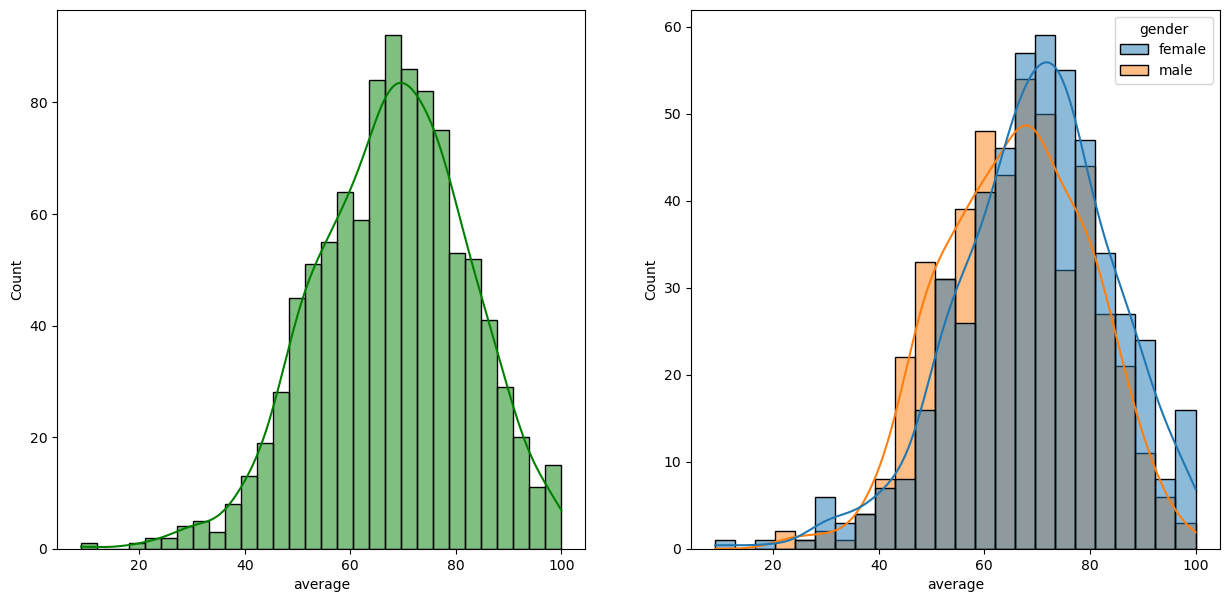

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df,x='average', kde=True, hue='gender', ax = axs[1])

plt.show()

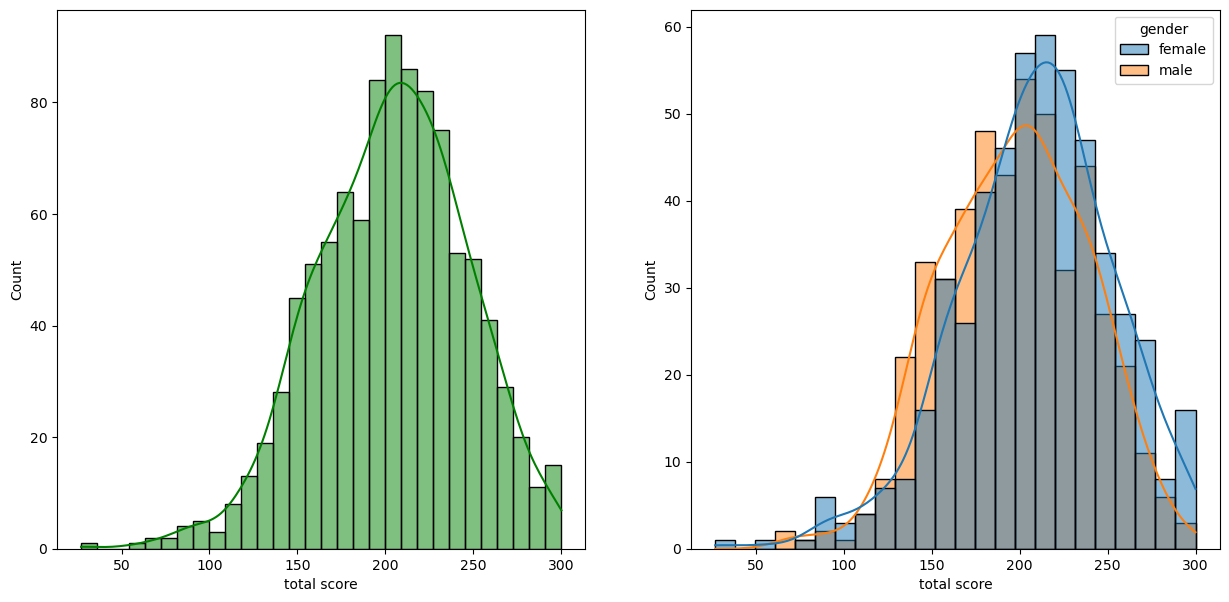

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')

plt.show()

#### Insights
- Female students tend to perform well than male students.

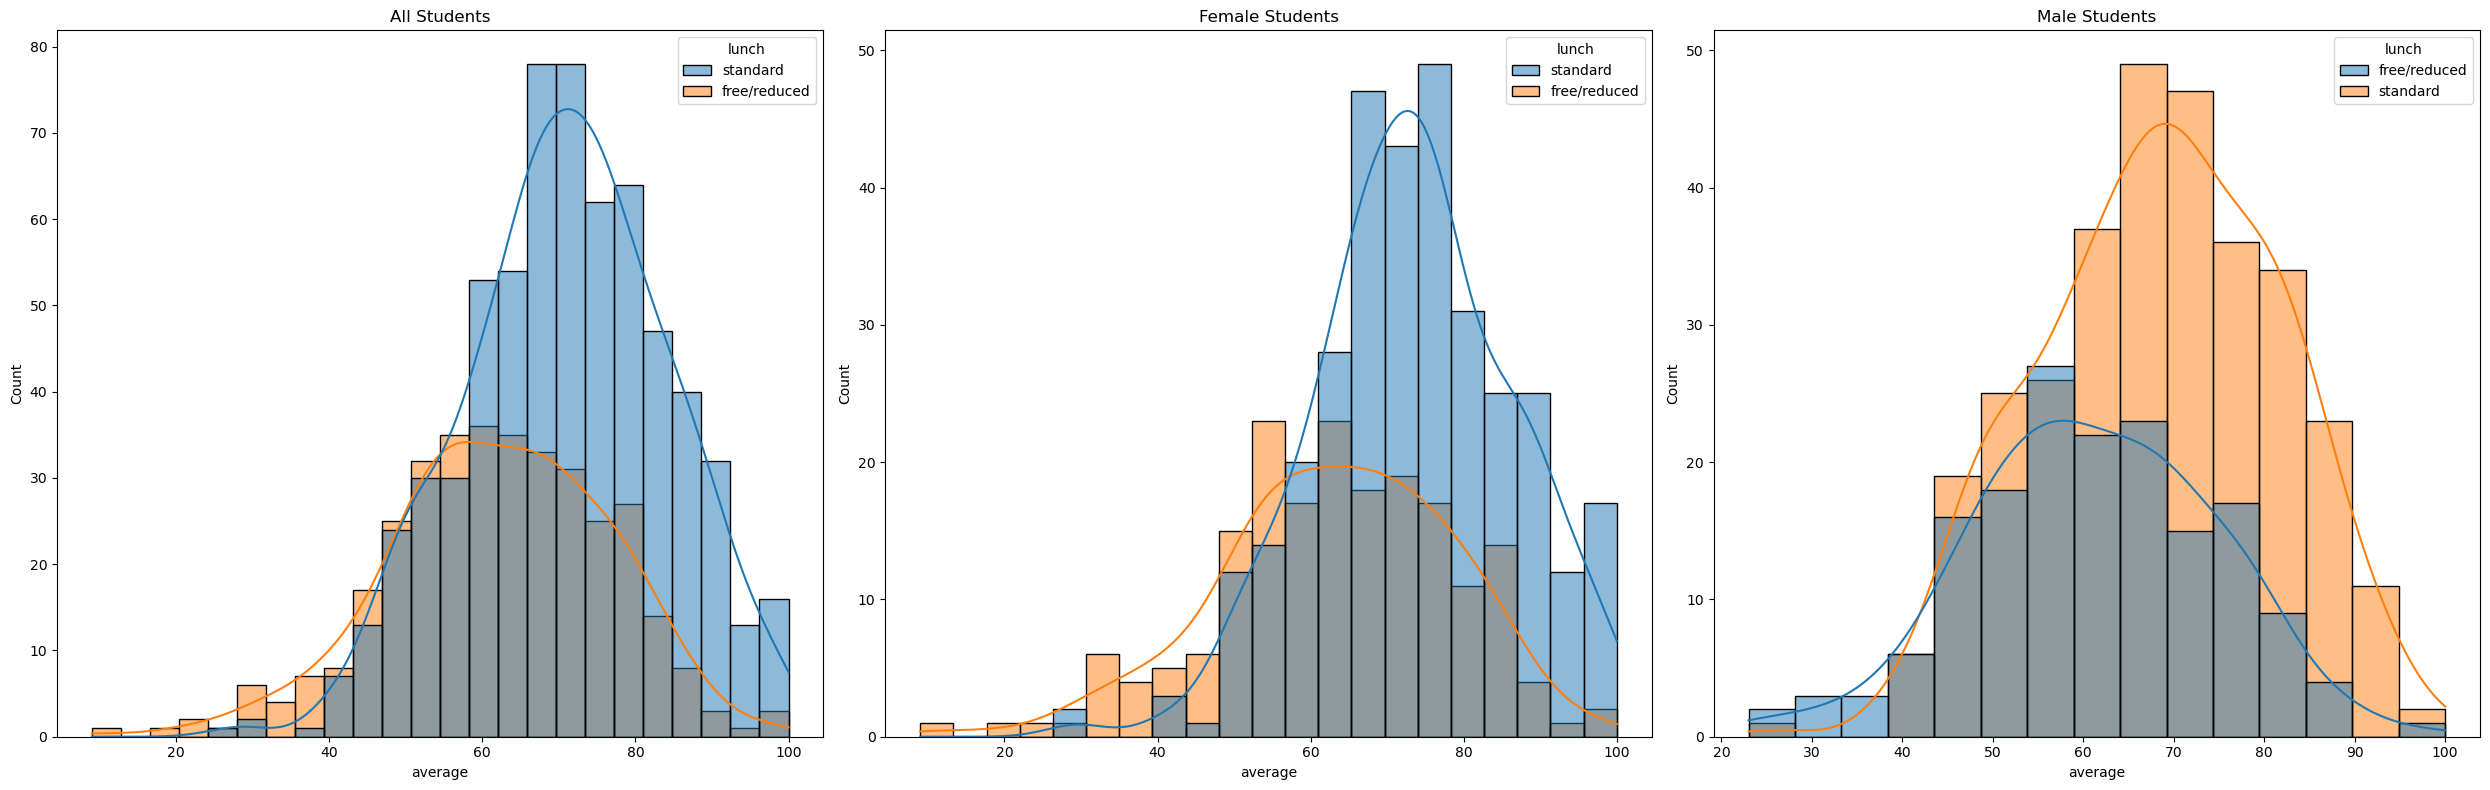

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Histogram of 'average' by 'lunch' for all data
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Students')

# Histogram of 'average' by 'lunch' for female students only
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Students')

# Histogram of 'average' by 'lunch' for male students only
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Students')

# Show the plot
plt.tight_layout()
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

### 4.2 Maximum scores of students in all 3 subjects

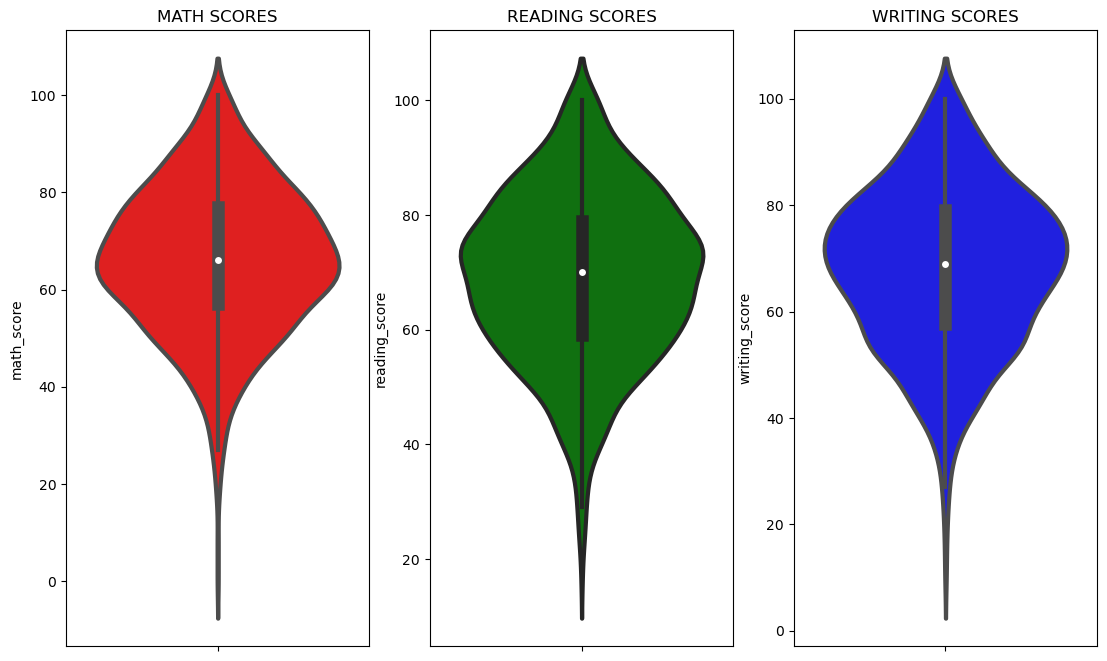

In [65]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### 4.3 Visualizing numerical data across different categories

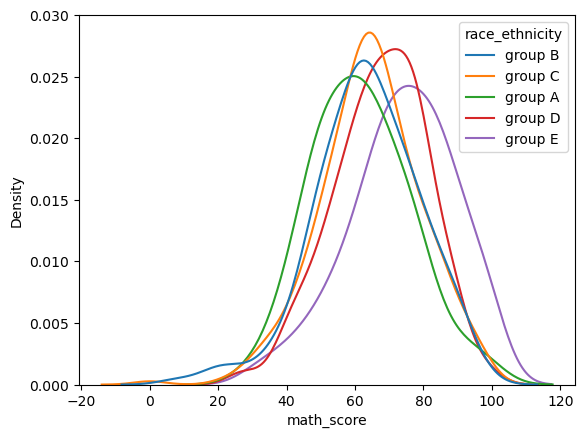

In [79]:
sns.kdeplot(data = df, x='math_score', hue='race_ethnicity', common_norm=False)
plt.show()

#### Insights
In KDE plots, the alignment of the peak can give insights into where the majority of data points are concentrated. A left-aligned peak indicates lower central values, while a right-aligned peak suggests higher central values. Group E’s KDE curve is the most right-aligned, it indicates a highest central tendency in math scores.

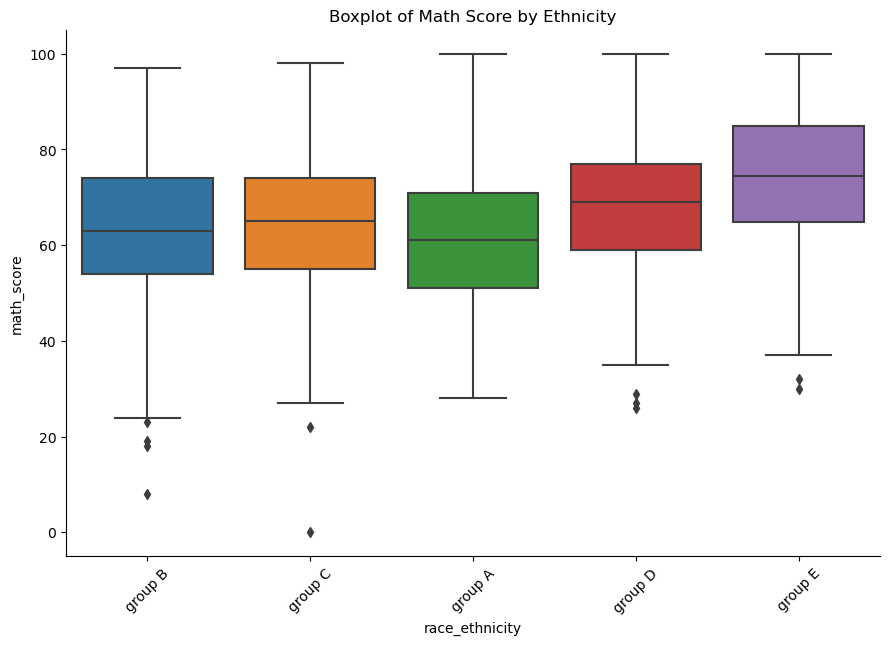

In [73]:
sns.catplot(data=df, x='race_ethnicity', y='math_score', kind='box', height=6, aspect=1.5)
plt.title('Boxplot of Math Score by Ethnicity')
plt.xticks(rotation=45)
plt.show()

#### Insights
-  Group E has the highest median math score among all groups, while Group A has the lowest median score.

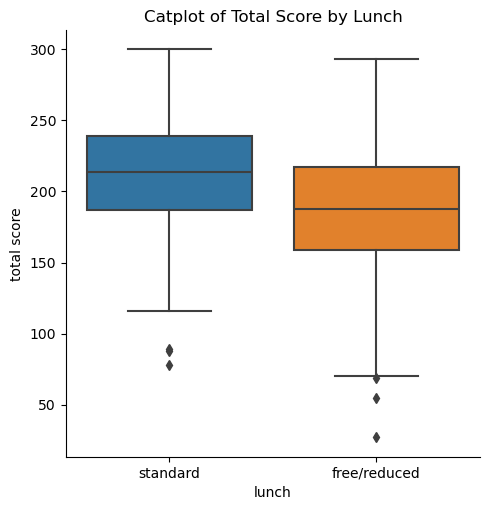

In [82]:
sns.catplot(data=df, x='lunch', y='total score', kind='box')
plt.title('Catplot of Total Score by Lunch')
plt.show()

#### Insights
- The median total score is higher for students with a standard lunch compared to those with a free/reduced lunch. This observation suggests a possible benefit of having a standard lunch.
- free/reduced lunch has higher number of outliers

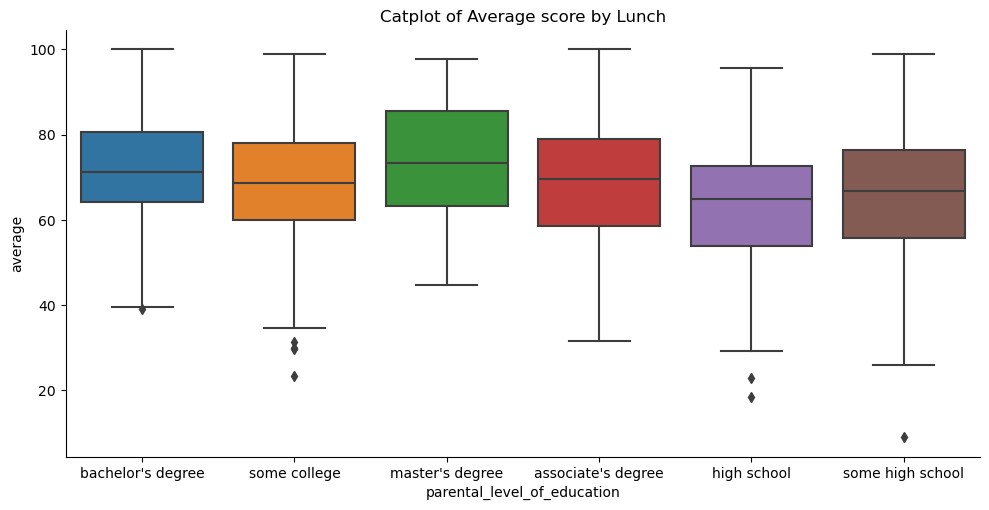

In [89]:
sns.catplot(data=df, x='parental_level_of_education', y='average', kind='box', aspect=2, height = 5)
plt.title('Catplot of Average score by Lunch')
plt.show()

In [83]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4.4 Multivariate analysis using pieplot

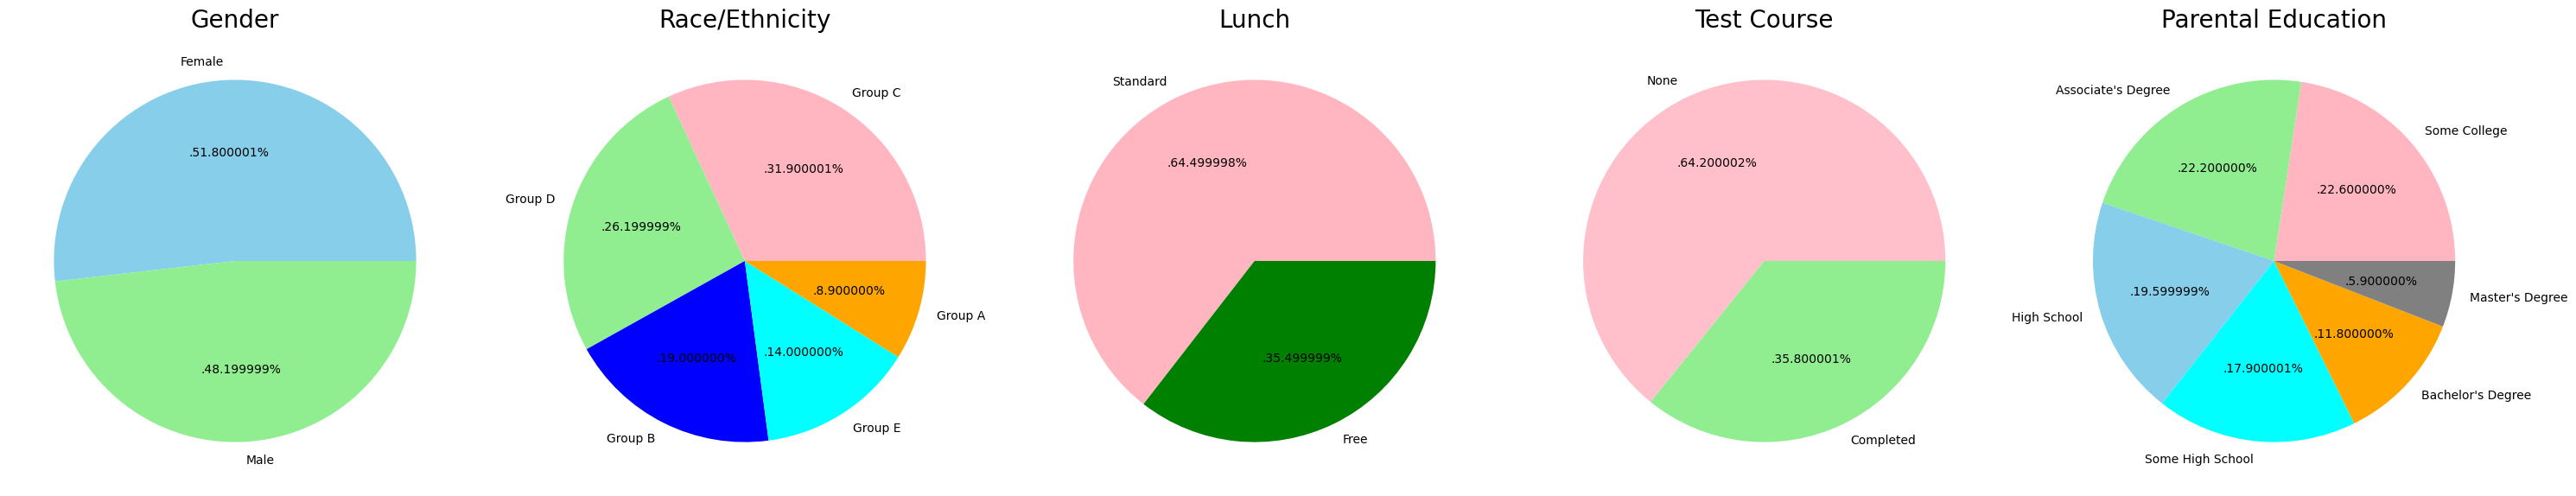

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['skyblue','lightgreen']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['lightpink', 'lightgreen', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['lightpink','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['pink','lightgreen']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['lightpink', 'lightgreen', 'skyblue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Gender Column
#### Univariate Analysis 
How is the distribution of Gender?

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

#### Bivariate Analysis
Is gender has any impact on student's performance ?

In [101]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have a better overall score than men.
- Males have scored higher in Maths.